<a href="https://colab.research.google.com/github/akwesi-duodu/GO2COD_2024_710/blob/main/linearweathermodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#weather prediction dataset using linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
#synthetic weather data
np.random.seed(0)
n_samples=1000

In [5]:
humidity=np.random.uniform(0,100,n_samples)
pressure=np.random.uniform(980,1050,n_samples)
wind_speed=np.random.uniform(0,30,n_samples)
temperature=20+0.5*humidity-0.02*pressure+0.1*wind_speed+np.random.normal(0,1,n_samples)

In [6]:
#dataframe for generated data
weather_data=pd.DataFrame({
    'humidity':humidity,
    'pressure':pressure,
    'wind_speed':wind_speed,
    'temperature':temperature
})

Text(0.5, 1.0, 'Humidity vs Temperature')

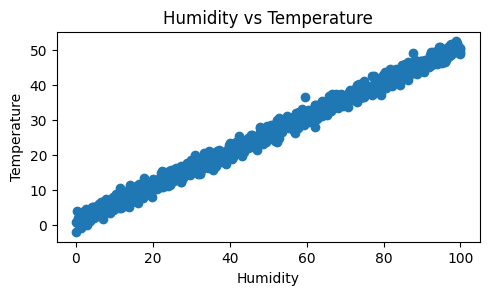

In [7]:
#visualising the data
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.scatter(weather_data['humidity'],weather_data['temperature'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')


Text(0.5, 1.0, 'Pressure vs Temperature')

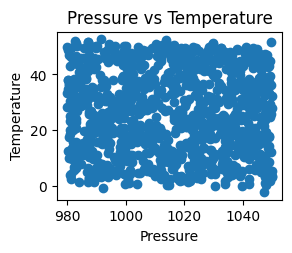

In [8]:
plt.subplot(2,2,2)
plt.scatter(weather_data['pressure'],weather_data['temperature'])
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Pressure vs Temperature')

Text(0.5, 1.0, 'Wind Speed vs Temperature')

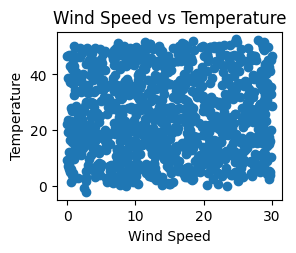

In [10]:
plt.subplot(2,2,3)
plt.scatter(weather_data['wind_speed'],weather_data['temperature'])
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Wind Speed vs Temperature')

In [11]:
#split data into features and target
X=weather_data[['humidity','pressure','wind_speed']]
y=weather_data['temperature']

In [13]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#create and train a linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
#make a prediction
y_pred=model.predict(x_test)
#evalute the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Absolute Error:{mae:.2f}')
print(f'Mean Squared Error:{mse:.2f}')

Mean Absolute Error:0.75
Mean Squared Error:0.86


Text(0.5, 1.0, 'Actual vs Predicted Temperature')

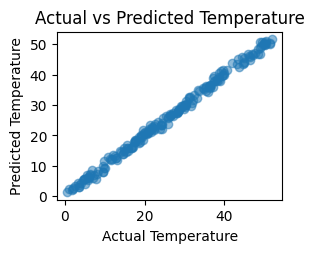

In [16]:
#visualising the model predictions vs actual values
plt.subplot(2,2,4)
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

In [17]:
#plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
#make predictions on new data with trained model
new_data=pd.DataFrame({'humidity':[65],'pressure':[1020],'wind_speed':[15]})
predicted_temperature=model.predict(new_data)
print(f'Predicted Temperature:{predicted_temperature[0]:.2f}')

Predicted Temperature:33.56
